In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import mapplot_utils as mymaps
from CASutils import colorbar_utils as cbars

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/checkswe/"

In [3]:
lens1 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/LENS1/SWE/swe_lens1_djf.nc")
lens2 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/LENS2/SWE/swe_lens2_djf.nc")

In [4]:
lens1m = lens1.mean(['member','time']).load()
lens2m = lens2.mean(['member','time']).load()

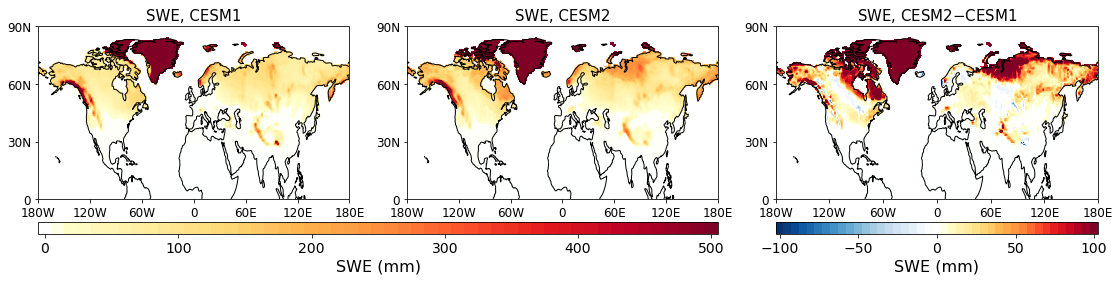

In [5]:
fig = plt.figure(figsize=(16,16))

ax1 = mymaps.contourmap_bothcontinents_fill_nh_pos(fig, lens1m.swe, lens1m.lon, lens1m.lat, 10, -500,500,
                                                 'SWE, CESM1',0.05,0.32,0.8,0.95)

ax2 = mymaps.contourmap_bothcontinents_fill_nh_pos(fig, lens2m.swe, lens2m.lon, lens2m.lat, 10, -500, 500,
                                                  'SWE, CESM2',0.37,0.64,0.8,0.95)

ax3 = mymaps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(lens2m.swe) - np.array(lens1m.swe), lens1m.lon, lens1m.lat, 5, -100, 100,
                                                  'SWE, CESM2$-$CESM1',0.69,0.97,0.8,0.95)

ax = cbars.plotcolorbar(fig, 10,-500,500,'SWE (mm)',0.05,0.64,0.77,0.78,posneg='pos')

ax = cbars.plotcolorbar(fig, 5, -100, 100, 'SWE (mm)',0.69,0.97,0.77,0.78)

fig.savefig(plotpath+"SWE.jpeg", bbox_inches='tight', facecolor='white')


#ax2 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(fsno_clm5_djf), np.array(fsno_clm5_djf.lon), np.array(fsno_clm5_djf.lat),0.1,-1,1,
#                                                 '(b) Snow fraction, CAM6_CLM5',0.37,0.64,0.8,0.95)

#ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(fsno_clm5_djf) - np.array(fsno_snowd_djf), np.array(fsno_snowd_djf.lon), np.array(fsno_snowd_djf.lat),0.1,-1,1,
#                                                 '(c) Snow fraction, CAM6_CLM5$-$SNWDENS', 0.69,0.97,0.8,0.95)


### ESA_CCI

In [6]:
dat = xr.open_mfdataset("/project/mojave/observations/SWE/ESA_CCI/data/*.nc")

In [7]:
monyearstr = xr.DataArray(dat.indexes['time'].strftime('%Y-%m'), coords=dat.time.coords, name='monyearstr')

In [10]:
datmonthly = dat.groupby(monyearstr).mean('time', skipna=True)

In [18]:
ystart=1979 ; yend=2014 ; nyears=yend-ystart+1

for iyear in np.arange(ystart,yend+1,1):
    print(iyear)
    djfdat = (datmonthly.sel(monyearstr=str(iyear)+"-11") + datmonthly.sel(monyearstr=str(iyear+1)+"-01") + datmonthly.sel(monyearstr=str(iyear+1)+"-02"))/3.
    
    if (iyear == ystart):
        swedjf = xr.DataArray(np.zeros([nyears, datmonthly.lat.size, datmonthly.lon.size]),
                             coords=[np.arange(ystart,yend+1,1), datmonthly.lat, datmonthly.lon],
                             dims=['year','lat','lon'], name='swedjf')
        
    swedjf[iyear-ystart,:,:] = djfdat.swe

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014


In [21]:
swedjfm = swedjf.mean('year')

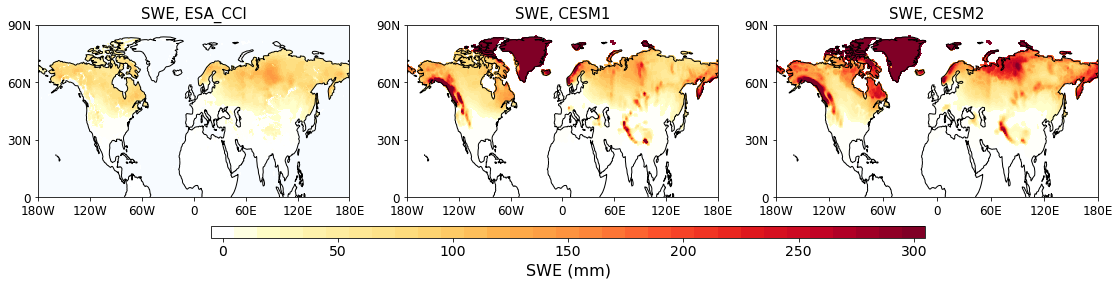

In [30]:
fig = plt.figure(figsize=(16,16))

ax1 = mymaps.contourmap_bothcontinents_fill_nh_pos(fig, swedjfm, swedjfm.lon, swedjfm.lat, 10, -300,300,
                                                 'SWE, ESA_CCI',0.05,0.32,0.8,0.95)

x1 = mymaps.contourmap_bothcontinents_fill_nh_pos(fig, lens1m.swe, lens1m.lon, lens1m.lat, 10, -300,300,
                                                 'SWE, CESM1',0.37,0.64,0.8,0.95)

ax2 = mymaps.contourmap_bothcontinents_fill_nh_pos(fig, lens2m.swe, lens2m.lon, lens2m.lat, 10, -300, 300,
                                                  'SWE, CESM2',0.69,0.97,0.8,0.95)

ax = cbars.plotcolorbar(fig, 10,-300,300,'SWE (mm)',0.2,0.82,0.765,0.775,posneg='pos')

fig.savefig(plotpath+'swe_comparison.jpeg', bbox_inches='tight', facecolor='white')

In [24]:
print(swedjfm)

<xarray.DataArray 'swedjf' (lat: 720, lon: 1440)>
array([[-30., -30., -30., ..., -30., -30., -30.],
       [-30., -30., -30., ..., -30., -30., -30.],
       [-30., -30., -30., ..., -30., -30., -30.],
       ...,
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.]])
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9


In [ ]:
ystart=1979 ; yend=2014 ; nyears=yend-ystart+1
for iyear in np.arange(ystart,yend+1,1):
    dat = xr.open_mfdataset("")

In [37]:
ystart=1979 ; yend=2014 ; nyears=yend-ystart+1
years = np.arange(ystart,yend+1,1)
years = years[years != 1981]

count=0
for iyear in np.arange(ystart,yend+1,1):
    
    if (iyear != 1981):
        dec = xr.open_dataset("/project/mojave/observations/GlobSnow/v3.0/"+str(iyear)+'12_northern_hemisphere_monthly_swe_0.25grid.nc')
        jan = xr.open_dataset("/project/mojave/observations/GlobSnow/v3.0/"+str(iyear+1)+'01_northern_hemisphere_monthly_swe_0.25grid.nc')
        feb = xr.open_dataset("/project/mojave/observations/GlobSnow/v3.0/"+str(iyear+1)+'02_northern_hemisphere_monthly_swe_0.25grid.nc')
        djf = (31/90.)*dec.swe + (31./90.)*jan.swe + (28./90.)*feb.swe
    
        if (iyear == ystart):
            globsnow = xr.DataArray(np.zeros([nyears-1, djf.y.size, djf.x.size]),
                               coords=[years, djf.y, djf.x], dims=['year','y','x'], name='swe')
        
        globsnow[count,:,:] = djf
        count=count+1

#dat = xr.open_mfdataset("/project/mojave/observations/GlobSnow/v3.0/*.nc", concat_dim=['time',None,None])

In [41]:
grid_out = xr.Dataset({'lat':(['lat'], lens1.lat)}, {'lon': (['lon'], lens1.lon)})

In [51]:
globsnow = globsnow.rename({'x':'lon', 'y':'lat'})

In [53]:
import xesmf as xe
globsnow = globsnow.rename({""})
regridder = xe.Regridder(globsnow, grid_out, 'bilinear', periodig=True, reuse_weights=False,
                        filename='wgtfile.nc')

/project/cas/islas/miniconda3/envs/islaenv/lib/python3.6/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


TypeError: __init__() got an unexpected keyword argument 'periodig'

In [47]:
print(globsnow)

<xarray.DataArray 'swe' (year: 35, y: 721, x: 721)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.

In [49]:
print(dec.crs)

<xarray.DataArray 'crs' ()>
array(b'', dtype='|S1')
Attributes:
    grid_mapping_name:               lambert_azimuthal_equal_area
    false_easting:                   0
    false_northing:                  0
    latitude_of_projection_origin:   90
    longitude_of_projection_origin:  0
    longitude_of_prime_meridian:     0
    semi_major_axis:                 6371228.0
    inverse_flattening:              0
    spatial_ref:                     PROJCS["NSIDC EASE-Grid North",GEOGCS["U...
    GeoTransform:                    -9036842.762 25067.525 0 9036842.7630000...
